# Deep learning MNIST tutorial

## Loading and transforming the data

We will consider the MNIST database which contains 60,000 28x28 grayscale images of the 10 digits, along with a test set of 10,000 images. in a first time, we load the data.

In [1]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation,Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD
from keras.utils import np_utils
import matplotlib
import matplotlib.pyplot as plt
import scipy
import scipy.ndimage
import numpy as np
from keras import backend as K
import keras

(X_train_base, y_train_base), (X_test_base, y_test_base) = mnist.load_data()


Using TensorFlow backend.


11493376/11490434 [==============================] - 10s    


Ploting the data
   

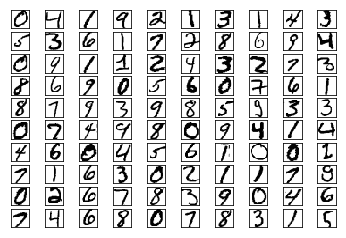

In [2]:
def plot_10_by_10_images(images):
    """ Plot 100 MNIST images in a 10 by 10 table. Note that we crop
    the images so that they appear reasonably close together.  The
    image is post-processed to give the appearance of being continued."""
    fig = plt.figure()
    images = [image[3:25, 3:25] for image in images]
    #image = np.concatenate(images, axis=1)
    for x in range(10):
        for y in range(10):
            ax = fig.add_subplot(10, 10, 10*y+x+1)
            ax.matshow(images[10*y+x+1], cmap = matplotlib.cm.binary)
            plt.xticks(np.array([]))
            plt.yticks(np.array([]))
    plt.show()

plot_10_by_10_images(X_train_base)

Now we have the data we need to transform them into a shape that can be handled by the neural networks.

In [3]:
subset=10000 #size
nb_classes=10
X_train = X_train_base[:subset].reshape(subset, 784)
X_test = X_test_base.reshape(10000, 784)
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")
X_train /= 255
X_test /= 255
y_train = np_utils.to_categorical(y_train_base[:subset], nb_classes)
y_test = np_utils.to_categorical(y_test_base, nb_classes)


We now have vectors instead of images

In [4]:
print(X_train_base.shape)
print(X_train.shape)

(60000, 28, 28)
(10000, 784)


## Learning the network

The next task is to build the network. 
In the learn model function, the neural networks shape is obtained by using the keras functions :
* __model.add(Dense(nbhiden, [input_shape=(nbinput,1)], [activation='activationfunction']))__ : which adds an hidden layer to the network. nbhidden is the number of hidden nodes. [input_shape=(nbinput,)] corresponds to the input layer, [activation='activationfunction'] is the activation function of the layer
* __model.add(Dropout(value))__ : apply dropout to the layer (to avoid overfitting)

Here is the simplest network you can build :

In [5]:
model = Sequential()
model.add(Dense(128, input_shape=(784,),activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes, activation='softmax'))
    
sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],  optimizer=sgd)

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


__Question__: Describe the neural networks

Then, we learn the parameters of the network

In [6]:
batch_size = 256
epochs=50
model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs,  verbose=1, validation_data=(X_test, y_test))

Train on 10000 samples, validate on 10000 samples
Epoch 1/50
10000/10000 [==============================] - 0s - loss: 0.9372 - acc: 0.6973 - val_loss: 0.4066 - val_acc: 0.8704
Epoch 2/50
10000/10000 [==============================] - 0s - loss: 0.3692 - acc: 0.8925 - val_loss: 0.4193 - val_acc: 0.8633
Epoch 3/50
10000/10000 [==============================] - 0s - loss: 0.2899 - acc: 0.9139 - val_loss: 0.3623 - val_acc: 0.8795
Epoch 4/50
10000/10000 [==============================] - 0s - loss: 0.2357 - acc: 0.9321 - val_loss: 0.2487 - val_acc: 0.9238
Epoch 5/50
10000/10000 [==============================] - 0s - loss: 0.1957 - acc: 0.9442 - val_loss: 0.3296 - val_acc: 0.8972
Epoch 6/50
10000/10000 [==============================] - 0s - loss: 0.1740 - acc: 0.9477 - val_loss: 0.2180 - val_acc: 0.9359
Epoch 7/50
10000/10000 [==============================] - 0s - loss: 0.1420 - acc: 0.9576 - val_loss: 0.1962 - val_acc: 0.9433
Epoch 8/50
10000/10000 [==============================] - 0s 

Last, we analyse the results :

__Question__ : Propose and apply your own neural networks. Try to achieve the best results as possible

The accuracy on the test set is  95.76 %


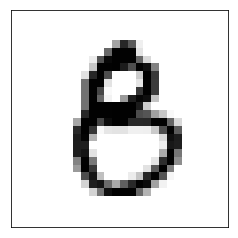

1/1 [==============================] - 0s
le chiffre reconnu est:  8
le chiffre à reconnaitre  est:  8


In [7]:
def plot_mnist_digit(image):
    """ Plot a single MNIST image."""
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.matshow(image, cmap = matplotlib.cm.binary)
    plt.xticks(np.array([]))
    plt.yticks(np.array([]))
    plt.show()
loss,acc = model.evaluate(X_test, y_test,  verbose=0)
index=800
print('The accuracy on the test set is ',(acc*100),'%')
plot_mnist_digit(X_test_base[index])
cl=model.predict_classes(X_test[index].reshape((1,784)))


print("le chiffre reconnu est: ", cl[0])
print("le chiffre à reconnaitre  est: ", np.argmax(y_test[index]))

## CNN

We will now consider a new kind of network that consider image directly

In [8]:
img_rows, img_cols = 28, 28
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train[:subset].reshape(x_train[:subset].shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
y_train = keras.utils.to_categorical(y_train[:subset], nb_classes)
y_test = keras.utils.to_categorical(y_test, nb_classes)


In [9]:
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (10000, 28, 28, 1)
10000 train samples
10000 test samples


In [10]:
model = Sequential()
model.add(Conv2D(1, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))

model.add(Dense(nb_classes, activation='softmax'))

sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],  optimizer=sgd)

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 1)         10        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 1)         0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 13, 13, 1)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 169)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                10880     
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 64)                4160      
__________

In [11]:
batch_size = 256
epochs=20
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs,  verbose=1, validation_data=(x_test, y_test))

Train on 10000 samples, validate on 10000 samples
Epoch 1/20
10000/10000 [==============================] - 1s - loss: 2.2332 - acc: 0.1824 - val_loss: 1.5851 - val_acc: 0.4946
Epoch 2/20
10000/10000 [==============================] - 1s - loss: 1.2532 - acc: 0.5790 - val_loss: 0.6247 - val_acc: 0.8007
Epoch 3/20
10000/10000 [==============================] - 1s - loss: 0.8640 - acc: 0.7216 - val_loss: 0.5123 - val_acc: 0.8421
Epoch 4/20
10000/10000 [==============================] - 1s - loss: 0.7778 - acc: 0.7498 - val_loss: 0.4983 - val_acc: 0.8468
Epoch 5/20
10000/10000 [==============================] - 1s - loss: 0.7329 - acc: 0.7625 - val_loss: 0.4064 - val_acc: 0.8719
Epoch 6/20
10000/10000 [==============================] - 1s - loss: 0.6889 - acc: 0.7780 - val_loss: 0.3715 - val_acc: 0.8810
Epoch 7/20
10000/10000 [==============================] - 1s - loss: 0.6427 - acc: 0.7947 - val_loss: 0.3539 - val_acc: 0.8921
Epoch 8/20
10000/10000 [==============================] - 1s 

The accuracy on the test set is  91.0 %


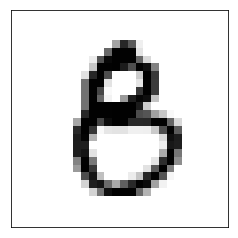

1/1 [==============================] - 0s
le chiffre reconnu est:  8
le chiffre à reconnaitre  est:  8


In [12]:
def plot_mnist_digit(image):
    """ Plot a single MNIST image."""
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.matshow(image, cmap = matplotlib.cm.binary)
    plt.xticks(np.array([]))
    plt.yticks(np.array([]))
    plt.show()
loss,acc = model.evaluate(x_test, y_test,  verbose=0)
index=800
print('The accuracy on the test set is ',(acc*100),'%')
plot_mnist_digit(X_test_base[index])
cl=model.predict_classes(x_test[index].reshape((1,28,28,1)))


print("le chiffre reconnu est: ", cl[0])
print("le chiffre à reconnaitre  est: ", np.argmax(y_test[index]))


## Auto encoder

In [13]:
encoding_dim = 2

model = Sequential()
model.add(Dense(encoding_dim, input_shape=(784,),activation='relu'))

model.add(Dense(784, activation='sigmoid'))
    
sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='binary_crossentropy',  optimizer=sgd)

model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 2)                 1570      
_________________________________________________________________
dense_8 (Dense)              (None, 784)               2352      
Total params: 3,922
Trainable params: 3,922
Non-trainable params: 0
_________________________________________________________________


In [ ]:
(X_train, _), (X_test, _) = mnist.load_data()
subset=50000 #size
X_train = X_train[:subset].reshape(subset, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")
X_train /= 255
X_test /= 255

In [ ]:
model.fit(X_train, X_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(X_test, X_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 1s - loss: 0.4491 - val_loss: 0.2761
Epoch 2/50
50000/50000 [==============================] - 1s - loss: 0.2743 - val_loss: 0.2710
Epoch 3/50
50000/50000 [==============================] - 1s - loss: 0.2703 - val_loss: 0.2672
Epoch 4/50
50000/50000 [==============================] - 1s - loss: 0.2654 - val_loss: 0.2611
Epoch 5/50
50000/50000 [==============================] - 1s - loss: 0.2589 - val_loss: 0.2553
Epoch 6/50
50000/50000 [==============================] - 1s - loss: 0.2551 - val_loss: 0.2531
Epoch 7/50
50000/50000 [==============================] - 1s - loss: 0.2535 - val_loss: 0.2520
Epoch 8/50
50000/50000 [==============================] - 1s - loss: 0.2526 - val_loss: 0.2510
Epoch 9/50
50000/50000 [==============================] - 1s - loss: 0.2518 - val_loss: 0.2504
Epoch 10/50
50000/50000 [==============================] - 1s - loss: 0.2512 - val_loss: 0.2498

In [ ]:
decoded_imgs = model.predict(X_test)

In [ ]:
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()